<a href="https://colab.research.google.com/github/us/addons/blob/add-adamw-tutorial/docs/tutorials/optimizers_adamw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 The TensorFlow Authors.

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Addons Optimizers: AdamW
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/addons/tutorials/optimizers_adamw"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/addons/blob/master/docs/tutorials/optimizers_adamw.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/addons/blob/master/docs/tutorials/optimizers_adamw.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/addons/docs/tutorials/optimizers_adamw.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Overview
This notebook will demonstrate how to use the AdamW function in TensorFlow Addons and compares with Adam optimizer on **CIFAR10 dataset**.

**Resources**:

- [Decoupled Weight Decay Regularization (AdamW Paper)](https://arxiv.org/abs/1711.05101)

- [AdamW and Super-convergence is now the fastest way to train neural nets
](https://www.fast.ai/2018/07/02/adam-weight-decay/#implementing-adamw)

- [What’s up with Deep Learning optimizers since Adam?](https://medium.com/vitalify-asia/whats-up-with-deep-learning-optimizers-since-adam-5c1d862b9db0)


## AdamW
AdamW is a optimizer that implements the Adam algorithm with weight decay and it's described in ["Decoupled
Weight Decay Regularization"](https://arxiv.org/abs/1711.05101) by Loshchilov & Hutter.

This paper points out that all the popular Deep Learning frameworks (Tensorflow, Pytorch) have implemented Adam with weight decay wrong. They made the following observations:
- L2 regularization and weight decay is not the same.
- L2 regularization is not effective in Adam.
- Weight decay is equally effective in both Adam and SGD.

- In SGD, L2 regularization and weight decay can be made equivalent by reparameterization trick.
- Popular libraries implement weight decay as L2 regularization for both SGD and Adam.
- They propose AdamW and SGDW that decouple weight decay and L2 regularization steps.

# ![Adam vs AdamW](https://i.imgur.com/VkJtUyNl.png)

### Import TensorFlow

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [0]:
import tensorflow_addons as tfa

## Load CIFAR10 Data

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 6s 0us/step


## Compile and train the model with Adam

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 291us/sample - loss: 1.5536 - accuracy: 0.4298 - val_loss: 1.2978 - val_accuracy: 0.5322
Epoch 2/50
50000/50000 [==============================] - 7s 143us/sample - loss: 1.1948 - accuracy: 0.5719 - val_loss: 1.1137 - val_accuracy: 0.6086
Epoch 3/50
50000/50000 [==============================] - 7s 143us/sample - loss: 1.0456 - accuracy: 0.6306 - val_loss: 1.0134 - val_accuracy: 0.6434
Epoch 4/50
50000/50000 [==============================] - 7s 143us/sample - loss: 0.9507 - accuracy: 0.6659 - val_loss: 1.1058 - val_accuracy: 0.6217
Epoch 5/50
50000/50000 [==============================] - 7s 144us/sample - loss: 0.8722 - accuracy: 0.6959 - val_loss: 0.9119 - val_accuracy: 0.6830
Epoch 6/50
50000/50000 [==============================] - 7s 139us/sample - loss: 0.8190 - accuracy: 0.7120 - val_loss: 0.8824 - val_accuracy: 0.6960
Epoch 7/50
50000/50000 [=========================

## Compile and train the model with AdamW

In [6]:
model_w = models.Sequential()
model_w.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_w.add(layers.MaxPooling2D((2, 2)))
model_w.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_w.add(layers.MaxPooling2D((2, 2)))
model_w.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_w.add(layers.Flatten())
model_w.add(layers.Dense(64, activation='relu'))
model_w.add(layers.Dense(10))

model_w.compile(optimizer=tfa.optimizers.AdamW(weight_decay=1e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_w = model_w.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 185us/sample - loss: 1.5027 - accuracy: 0.4539 - val_loss: 1.3171 - val_accuracy: 0.5231
Epoch 2/50
50000/50000 [==============================] - 8s 165us/sample - loss: 1.1371 - accuracy: 0.5948 - val_loss: 1.0722 - val_accuracy: 0.6222
Epoch 3/50
50000/50000 [==============================] - 8s 167us/sample - loss: 0.9931 - accuracy: 0.6496 - val_loss: 1.0198 - val_accuracy: 0.6411
Epoch 4/50
50000/50000 [==============================] - 8s 169us/sample - loss: 0.9040 - accuracy: 0.6827 - val_loss: 0.9536 - val_accuracy: 0.6690
Epoch 5/50
50000/50000 [==============================] - 9s 172us/sample - loss: 0.8318 - accuracy: 0.7087 - val_loss: 0.9027 - val_accuracy: 0.6867
Epoch 6/50
50000/50000 [==============================] - 8s 166us/sample - loss: 0.7728 - accuracy: 0.7293 - val_loss: 0.8801 - val_accuracy: 0.6988
Epoch 7/50
50000/50000 [==========================

## Compare Optimizers

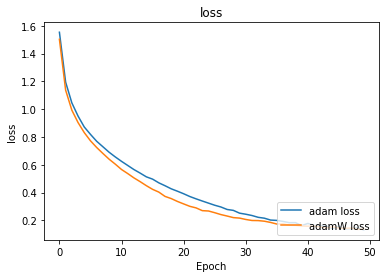

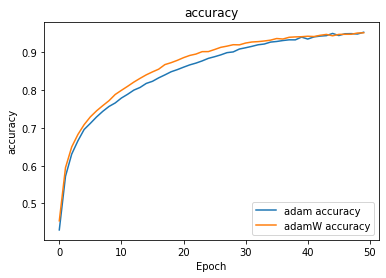

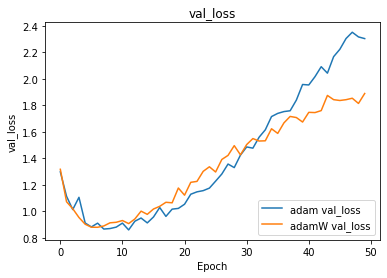

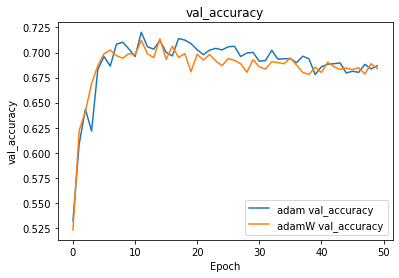

In [7]:
def compare_histories(adam_history, adamW_history, key):
  plt.title(key)
  plt.plot(adam_history.history[key], label="adam {}".format(key) )
  plt.plot(adamW_history.history[key], label="adamW {}".format(key) )
  plt.xlabel('Epoch')
  plt.ylabel(key)
  plt.legend(loc='lower right')
  plt.show()

for key in history.history.keys():
  compare_histories(history, history_w, key)


In [8]:
adam_test_loss, adam_test_acc = model.evaluate(test_images,  test_labels, verbose=2)
adam_w_test_loss, adam_w_test_acc = model_w.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 1s - loss: 2.3032 - accuracy: 0.6868
10000/10000 - 1s - loss: 1.8890 - accuracy: 0.6841


In [9]:
print('adam test loss =  ', adam_test_loss)
print('adamW test loss = ', adam_w_test_loss)
print()
print('adam test accuracy =  ', adam_test_acc)
print('adamW test accuracy = ', adam_w_test_acc)

adam test loss =   2.3031855819702147
adamW test loss =  1.8890144672393798

adam test accuracy =   0.6868
adamW test accuracy =  0.6841
